# Assignment - ICP5


## Q2. Optical Recognition of Handwritten Digits

In [160]:
#importing datasets and libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn import datasets
import os
digits = datasets.load_digits()

### 1. Implement [SVM, Naïve Bayes, KNN] methods using scikit-learn library.

In [161]:
#exploring dataset
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [162]:
digits.images.shape

(1797, 8, 8)

In [163]:
# printing first image values from dataset
print(digits.images[0])

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


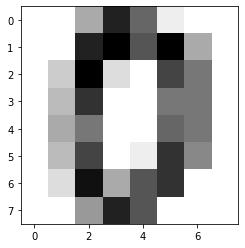

In [164]:
# plotting the first image values
plt.imshow(digits.images[0], cmap='binary')
plt.show()

In [165]:
#creating feature and target arrays
X, y = digits.data, digits.target

In [166]:
#splittig into training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

In [167]:
# importing SVM library
from sklearn.svm import SVC
svc = SVC()
# fit X_train with y_train
svc.fit(X_train, y_train)
# predict accuracy
acc_svm = round(svc.score(X_train, y_train) * 100, 2)
acc_svm

99.51

In [168]:
# importing gaussianNB library
from sklearn.naive_bayes import GaussianNB
gaussian = GaussianNB()
# fit X_train with y_train
gaussian.fit(X_train, y_train)
# predict accuracy
acc_gaussian = round(gaussian.score(X_train, y_train) * 100, 2)
acc_gaussian

85.32

In [169]:
# importing bernoulliNB library
from sklearn.naive_bayes import BernoulliNB
bernoulli = BernoulliNB()
# fit X_train with y_train
bernoulli.fit(X_train, y_train)
# predict accuracy
acc_bernoulli = round(bernoulli.score(X_train, y_train) * 100, 2)
acc_bernoulli

86.64

In [170]:
# importing KNN library
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
# fit X_train with y_train
knn.fit(X_train, y_train)
# predict accuracy
acc_knn = round(knn.score(X_train, y_train) * 100, 2)
acc_knn

99.23

### 2. Use the digits dataset available in the link above.

In [171]:
# load optdigits.tes as dataset 
ds_test = pd.read_csv('./optdigits.tes')
print(ds_test['0'].sum())
X = ds_test.iloc[:, 1:]
y = ds_test.iloc[:, 64:]
X = X.values

0


### 3. Visualize some of the images and analyze the data (explore the dataset).

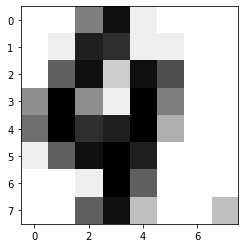

In [172]:
# showing image from 13 
d = X[13]
d.shape = (8, 8)
plt.imshow(d,cmap='binary')

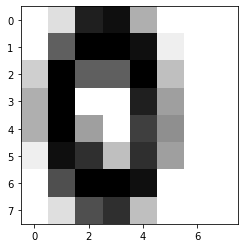

In [173]:
# showing image from 54 
d = X[54]
d.shape = (8, 8)
plt.imshow(d,cmap='binary')

### 4. Use train_test_split to create the training and testing parts.

In [174]:
# splitting dataset into train and test as test size = 20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=43)
print(X_train.shape, X_test.shape)


(1436, 64) (360, 64)


### 5. Evaluate the model on testing part using score and the classification_report() method.


In [175]:
# import classification report
from sklearn.metrics import classification_report
# predicting test data from classifier 
y_pred = svc.predict(X_test) 
class_report = classification_report(y_test, y_pred)
print(class_report)
# evaluate the model on test
acc_svm

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        30
           1       0.64      0.64      0.64        42
           2       0.57      0.90      0.70        31
           3       0.47      0.50      0.48        28
           4       0.57      0.94      0.71        33
           5       0.28      1.00      0.44        33
           6       1.00      0.21      0.35        38
           7       0.92      0.89      0.90        37
           8       0.84      0.37      0.52        43
           9       1.00      0.09      0.16        45

    accuracy                           0.54       360
   macro avg       0.63      0.55      0.49       360
weighted avg       0.66      0.54      0.49       360



99.51

In [176]:
# predicting test data from gaussian NB 
y_pred = gaussian.predict(X_test)
class_report = classification_report(y_test, y_pred)
print(class_report)
# evaluate the model on test
acc_gaussian

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        30
           1       0.10      0.31      0.15        42
           2       0.17      0.77      0.27        31
           3       0.10      0.07      0.08        28
           4       0.45      0.52      0.48        33
           5       0.00      0.00      0.00        33
           6       0.67      0.11      0.18        38
           7       0.00      0.00      0.00        37
           8       0.00      0.00      0.00        43
           9       0.00      0.00      0.00        45

    accuracy                           0.17       360
   macro avg       0.15      0.18      0.12       360
weighted avg       0.14      0.17      0.11       360



85.32

In [177]:
# evaluating test data from bernoulli NB 
y_pred = bernoulli.predict(X_test)
class_report = classification_report(y_test, y_pred)
print(class_report)
# evaluate the model on test
acc_bernoulli

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        30
           1       0.62      0.38      0.47        42
           2       0.28      0.97      0.43        31
           3       0.00      0.00      0.00        28
           4       0.89      0.24      0.38        33
           5       0.25      1.00      0.40        33
           6       0.89      0.42      0.57        38
           7       0.63      0.65      0.64        37
           8       0.61      0.26      0.36        43
           9       0.00      0.00      0.00        45

    accuracy                           0.38       360
   macro avg       0.42      0.39      0.32       360
weighted avg       0.43      0.38      0.33       360



86.64

In [178]:
# evaluating test data from bernoulli NB 
y_pred = knn.predict(X_test)
class_report = classification_report(y_test, y_pred)
print(class_report)
# evaluate the model on test
acc_knn

              precision    recall  f1-score   support

           0       1.00      0.20      0.33        30
           1       0.71      0.60      0.65        42
           2       0.42      1.00      0.60        31
           3       0.61      0.50      0.55        28
           4       0.87      0.79      0.83        33
           5       0.30      1.00      0.46        33
           6       1.00      0.55      0.71        38
           7       0.81      0.95      0.88        37
           8       0.94      0.37      0.53        43
           9       1.00      0.04      0.09        45

    accuracy                           0.58       360
   macro avg       0.77      0.60      0.56       360
weighted avg       0.78      0.58      0.55       360



99.23

### 6. Evaluate an image and visualize its own class.

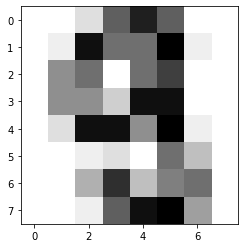

In [179]:
# showing image from 555, as we see its look like 9
plt.imshow(digits.images[555], cmap='binary')

In [180]:
#  make the array from 555 as we have 8*8 array
img = digits.images[555].reshape(1,-1)
img

array([[ 0.,  0.,  2., 10., 14., 10.,  0.,  0.,  0.,  1., 15.,  9.,  9.,
        16.,  1.,  0.,  0.,  7.,  9.,  0.,  9., 12.,  0.,  0.,  0.,  7.,
         7.,  3., 15., 15.,  0.,  0.,  0.,  2., 15., 15.,  7., 16.,  1.,
         0.,  0.,  0.,  1.,  2.,  0.,  9.,  4.,  0.,  0.,  0.,  5., 13.,
         4.,  8.,  9.,  0.,  0.,  0.,  1., 10., 15., 16.,  6.,  0.]])

In [181]:
# predict the chosen image with our KKN method model
y_pred = knn.predict(img)
y_pred

array([9])

### 7. Using KNN algorithm which K value can give good results?

In [182]:
# iterating through the value of 1-10 and put it in n value
for n in range(1, 11):
  knn = KNeighborsClassifier(n_neighbors=n)
  knn.fit(X_train, y_train)
  print('KNN: {}, is {}'.format(n, knn.score(X_train, y_train)) )

# printing the KNN max values from according arrays


KNN: 1, is 1.0
KNN: 2, is 0.9944289693593314
KNN: 3, is 0.995125348189415
KNN: 4, is 0.9944289693593314
KNN: 5, is 0.9923398328690808
KNN: 6, is 0.9909470752089137
KNN: 7, is 0.9923398328690808
KNN: 8, is 0.9916434540389972
KNN: 9, is 0.9923398328690808
KNN: 10, is 0.9909470752089137
